Decision Tree using built in python library


Sample of dataset:
   Feature1  Feature2  Feature3  Feature4  Target
0  1.488312  1.029156  0.472597 -0.003100       1
1  1.215801  0.413435  1.876796 -0.508897       1
2  0.952434 -0.034988  1.770801  0.739700       1
3  1.594970 -1.081057  1.053153  1.211660       1
4  0.575358 -0.544919  0.399136  1.480362       1


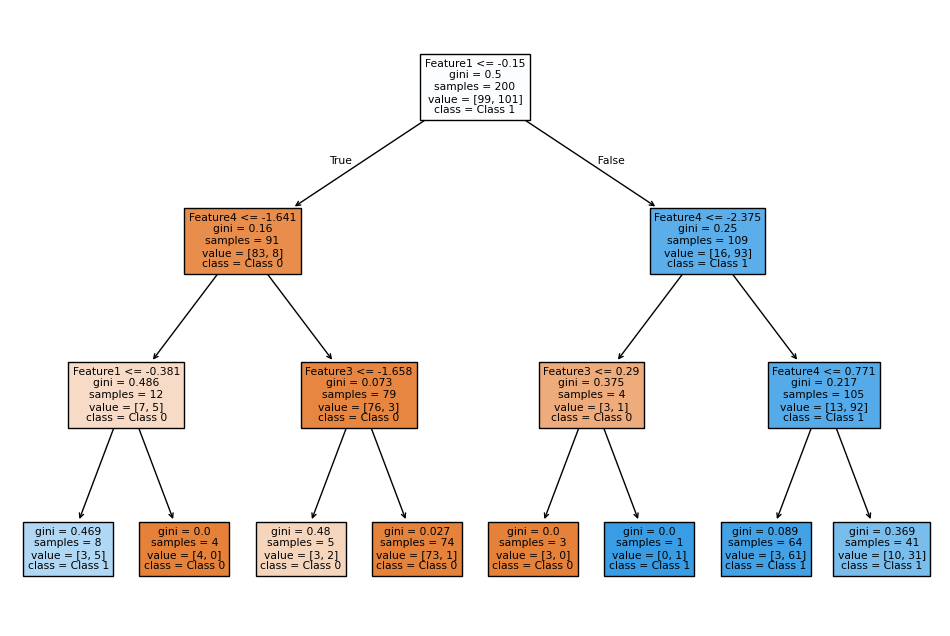

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Generate a random dataset (valid params this time)
X, y = make_classification(
    n_samples=200,       # number of rows
    n_features=4,        # total number of features
    n_informative=2,     # number of informative features
    n_redundant=0,       # no redundant features
    n_repeated=0,        # no repeated features
    n_classes=2,         # binary classification
    random_state=42
)

# Convert to DataFrame for clarity
feature_names = ["Feature1", "Feature2", "Feature3", "Feature4"]
df = pd.DataFrame(X, columns=feature_names)
df["Target"] = y

print("Sample of dataset:")
print(df.head())

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=["Class 0", "Class 1"], filled=True)
plt.show()


Decision Tree without using built in library

In [3]:
import numpy as np

def gini(y):
    classes = np.unique(y)
    impurity = 1.0
    for c in classes:
        p = np.sum(y == c) / len(y)
        impurity -= p ** 2
    return impurity

def split_dataset(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = X[:, feature] > threshold
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]


def best_split(X, y):
    best_feature, best_threshold, best_gini = None, None, 1.0
    n_samples, n_features = X.shape

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for t in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature, t)
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            g = (len(y_left) / n_samples) * gini(y_left) + \
                (len(y_right) / n_samples) * gini(y_right)

            if g < best_gini:
                best_feature, best_threshold, best_gini = feature, t, g

    return best_feature, best_threshold


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree(X, y, depth=0, max_depth=3):
    # If pure or depth reached → leaf
    if len(np.unique(y)) == 1 or depth >= max_depth:
        value = np.bincount(y).argmax()
        return Node(value=value)

    feature, threshold = best_split(X, y)
    if feature is None:
        value = np.bincount(y).argmax()
        return Node(value=value)

    X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)
    left = build_tree(X_left, y_left, depth + 1, max_depth)
    right = build_tree(X_right, y_right, depth + 1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left, right=right)

def predict_one(x, tree):
    if tree.value is not None:
        return tree.value
    if x[tree.feature] <= tree.threshold:
        return predict_one(x, tree.left)
    else:
        return predict_one(x, tree.right)

def predict(X, tree):
    return [predict_one(x, tree) for x in X]

np.random.seed(42)
X = np.random.rand(20, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # simple rule: sum > 1 → class 1

tree = build_tree(X, y, max_depth=3)


preds = predict(X, tree)
print("Predictions:", preds)
print("True labels:", y.tolist())


Predictions: [np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1)]
True labels: [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
